## Drawing

This notebook is for making / demoing my drawing-based images. This currently includes:

- Chinese character based art
- Shape based art

How can I actually generate art? Steps are as follows:

- Generate PNG from code below (TODO - try SVG?)
- Visit [url](https://cam.openbuilds.com), pick the Acro A1 DrawBot with scribe extension
- Upload the PNG (drag and drop works)
- Select document (single checkbox) and select the following options:
    - "Pen Plotter: (no offset)" as type of cut
    - Endmill / Pen Diameter: 1mm (TODO - different width?)
- Click "Generate G-Code", and then you can click the eye icon to preview the G-Code (and copy it)

Still haven't figured out sizes - how can we resize without changing quality? Maybe only by making it an SVG? Or just get the GCode and scale it down via hacky regex Python?

Final update - I think I should just create GCode for this directly. How? Answer: greedily. Loop around a circle, and then without even raising the pen just move back around the circle to find the closest once that's next (greedily).

In [ ]:
from IPython import get_ipython

ipython = get_ipython()
ipython.run_line_magic("load_ext", "autoreload")
ipython.run_line_magic("autoreload", "2")

import copy
import gc
import json
import os
import pickle
import time
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
import pyperclip
from IPython.display import HTML, SVG, Image, clear_output, display
from PIL import Image as PIL_Image
from PIL import ImageDraw

import drawing

In [ ]:
# Some hacky file modifications for my blog site

path = "C:/Users/calsm/Documents/Blog/python-getting-started/blog/static/imgs/index"

for name in ["stag", "tiger", "duck"]:
    full_path = f"{path}/{name}-physical-min.jpg"
    if not os.path.exists(full_path):
        full_path = full_path.replace(".jpg", ".jpeg")
        assert os.path.exists(full_path), f"File {full_path} does not exist"

    # Get the aspect ratio of the svg image
    full_path_svg = f"{path}/{name}-digital.svg"
    assert os.path.exists(full_path_svg), f"File {full_path_svg} does not exist"
    with open(full_path_svg, "r") as f:
        svg = f.read()
    svg_width = float(svg.split("width=")[1].split('"')[1])
    svg_height = float(svg.split("height=")[1].split('"')[1])

    # Load the image
    img = PIL_Image.open(full_path)
    # Resize according to the aspect ratio
    img = img.resize((img.width, int(img.width * (svg_height / svg_width))))
    # Save back out, with "resized" in the filename
    img.save(full_path.replace("-min", "-resized"))

## Drawing (actual pieces)

What have I learned so far?

- Going down to min size of about 0.05 will give you closer accuracy to the exact image (cause you can draw tiny things)
    - So you want it small but not too small (e.g. 0.08)
- Increasing `n_random` does help: up to about 500 is very beneficial (I guess because of the larger parameter space)
- `1050` shapes, and size range of `(0.08, 0.5)` seemed like a good starting point (but I think doing more would be okay, it wasn't too dark anywhere) and finished in under half an hour








### Butterfly

In [ ]:
mydraw = drawing.Drawing(
    target=drawing.TargetImage(
        image_path="images/butterfly_mid.png",
        weight_image_path=None,
        palette=[(0, 0, 0)],
        x=800,
        output_x=1800,
        blur_rad=2,
    ),
    n_shapes=2800,
    n_random=250,
    darkness=0.25,
    negative_penalty=0.0,
    outer_bound=None,
    inner_bound=None,
    shape=drawing.Shape(
        shape_type=drawing.ShapeType.HEX,
        size_range=(0.06, 0.3),
    ),
)

canvas, svg, all_coords, _, _, _ = mydraw.create_img()

# canvas.save("outputs_drawing/butterfly_01.png")
# np.savez("outputs_drawing/butterfly_01.npz", **all_coords)
# # replace('<svg', '<svg transform="scale(0.5) translate(-500, -500)",', 1))
display(SVG(svg.replace("background-color: transparent", "background-color: white")))


In [ ]:
# with open(
#     r"C:\Users\calsm\Documents\Blog\python-getting-started\blog\static\imgs\butterfly-hex.svg"
# ) as f:
#     svg = f.read()

size = 1800
width = 1800
height = 600
x = (size - width) // 2 + 50
y = (size - height) // 2 - 40

svg_to_save = (
    svg.replace("<svg", f'<svg viewBox="{x} {y} {width} {height}"', 1)
    .replace(f'width="{size}"', f'width="{width}"')
    .replace(f'height="{size}"', f'height="{height}"')
    .replace('stroke="black"', 'stroke="rgba(0,0,0,0.25)" stroke-width="0.6"')
    # .replace("background-color: transparent", "background-color: white")
)
display(SVG(svg_to_save.replace("background-color: transparent", "background-color: white")))

with open(
    r"C:\Users\calsm\Documents\Blog\python-getting-started\blog\static\imgs\butterfly-hex.svg", "w"
) as f:
    f.write(svg_to_save)

In [ ]:
mydraw = drawing.Drawing(
    target=drawing.TargetImage(
        image_path="images/butterfly_light_2.png",
        weight_image_path=None,
        palette=[(0, 0, 0)],
        x=600,
        output_x=1600,
        blur_rad=2,
    ),
    n_shapes=1600,
    n_random=250,
    darkness=0.12,
    negative_penalty=0.0,
    outer_bound=None,
    inner_bound=None,
    shape=drawing.Shape(
        line_type=drawing.LineType.BEZIER,
        size_range=(0.06, 0.6),
        endpoint_angle_range=(np.pi * 0.1, np.pi * 0.8),
        bezier_end_angle_range=(-np.pi * 0.8, np.pi * 0.8),
    ),
    # shape=drawing.Shape(
    #     shape_type=drawing.ShapeType.HEX,
    #     size_range=(0.06, 0.3),
    # ),
)

canvas, svg, all_coords, border_lengths, target_y, target_x = mydraw.create_img()

# canvas.save("outputs_drawing/butterfly_01.png")
# np.savez("outputs_drawing/butterfly_01.npz", **all_coords)
# # replace('<svg', '<svg transform="scale(0.5) translate(-500, -500)",', 1))
display(SVG(svg.replace("background-color: transparent", "background-color: white")))


In [ ]:
size = 1600
width = 1050
height = 350
x = (size - width) // 2 + 50
y = (size - height) // 2 - 20

svg_to_save = (
    svg.replace("<svg", f'<svg viewBox="{x} {y} {width} {height}"', 1)
    .replace(f'width="{size}"', f'width="{width}"')
    .replace(f'height="{size}"', f'height="{height}"')
    .replace('stroke="black"', 'stroke="rgba(0,0,0,0.2)" stroke-width="0.6"')
    # .replace("background-color: transparent", "background-color: white")
)
display(SVG(svg_to_save.replace("background-color: transparent", "background-color: white")))

with open(
    r"C:\Users\calsm\Documents\Blog\python-getting-started\blog\static\imgs\butterfly-draw.svg", "w"
) as f:
    f.write(svg_to_save)

In [ ]:
mydraw = drawing.Drawing(
    target=drawing.TargetImage(
        image_path="images/butterfly_light.png",
        weight_image_path=None,
        palette=[(0, 0, 0)],
        x=700,
        output_x=1200,
        blur_rad=2,
    ),
    n_shapes=1200,
    n_random=250,
    darkness=0.12,
    negative_penalty=0.0,
    outer_bound=None,
    inner_bound=None,
    shape=drawing.Shape(
        line_type=drawing.LineType.BEZIER,
        size_range=(0.06, 0.6),
        endpoint_angle_range=(np.pi * 0.1, np.pi * 0.8),
        bezier_end_angle_range=(-np.pi * 0.8, np.pi * 0.8),
    ),
    # shape=drawing.Shape(
    #     shape_type=drawing.ShapeType.HEX,
    #     size_range=(0.06, 0.3),
    # ),
)

canvas, svg, all_coords, border_lengths, target_y, target_x = mydraw.create_img()

display(canvas.resize((500, 500)))

canvas.save("outputs_drawing/butterfly_01.png")
np.savez("outputs_drawing/butterfly_01.npz", **all_coords)
with open("outputs_drawing/butterfly_01.svg", "w") as f:
    f.write(svg)

In [ ]:
mydraw = drawing.Drawing(
    target=drawing.TargetImage(
        image_path="images/butterfly.png",
        weight_image_path=None,
        palette=[(0, 0, 0)],
        x=700,
        output_x=1200,
        blur_rad=2,
    ),
    n_shapes=2200,
    n_random=250,
    darkness=0.12,
    negative_penalty=0.0,
    outer_bound=None,
    inner_bound=None,
    shape=drawing.Shape(
        line_type=drawing.LineType.BEZIER,
        size_range=(0.06, 0.6),
        endpoint_angle_range=(np.pi * 0.1, np.pi * 0.8),
        bezier_end_angle_range=(-np.pi * 0.8, np.pi * 0.8),
    ),
    # shape=drawing.Shape(
    #     shape_type=drawing.ShapeType.HEX,
    #     size_range=(0.06, 0.3),
    # ),
)

canvas, svg, all_coords, border_lengths, target_y, target_x = mydraw.create_img()

display(canvas.resize((500, 500)))

canvas.save("outputs_drawing/butterfly_01.png")
np.savez("outputs_drawing/butterfly_01.npz", **all_coords)

### Logo

In [ ]:
mydraw = drawing.Drawing(
    target=drawing.TargetImage(
        image_path="images/logo.png",
        weight_image_path=None,
        palette=[(0, 0, 0)],
        x=800,
        output_x=1500,
        blur_rad=2,
    ),
    n_shapes=1300,
    n_random=400,
    darkness=0.12,
    negative_penalty=0.0,
    outer_bound=1 / 40,
    inner_bound=1 / 40,
    shape=drawing.Shape(
        line_type=drawing.LineType.BEZIER,
        size_range=(0.06, 0.6),
        endpoint_angle_range=(np.pi * 0.1, np.pi * 0.8),
        bezier_end_angle_range=(-np.pi * 0.8, np.pi * 0.8),
    ),
)

canvas, svg, all_coords, border_lengths, target_y, target_x = mydraw.create_img()

display(canvas.resize((500, 500)))

canvas.save("outputs_drawing/logo_01.png")
np.savez("outputs_drawing/logo_01.npz", **all_coords)

### Mum

Drawing black: 100%|██████████| 900/900 [01:57<00:00,  7.64it/s]


  Bounding box (rescaled, inner):  [0.075206-0.464705, 0.138955-0.507628], AR = 0.946532


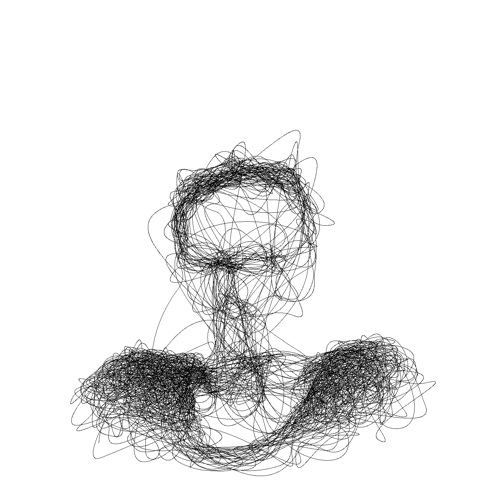

In [12]:
mydraw = drawing.Drawing(
    target=drawing.TargetImage(
        image_path="images/mum-3.jpg",
        weight_image_path=None,
        palette=[(0, 0, 0)],
        x=800,
        output_x=1500,
        blur_rad=2,
    ),
    n_shapes=900,
    n_random=200,
    darkness=0.12,
    negative_penalty=0.0,
    outer_bound=0 / 30,
    inner_bound=2 / 30,
    shape=drawing.Shape(
        line_type=drawing.LineType.BEZIER,
        size_range=(0.09, 0.5),
        endpoint_angle_range=(np.pi * 0.1, np.pi * 0.8),
        bezier_end_angle_range=(-np.pi * 0.8, np.pi * 0.8),
    ),
)

canvas, svg, all_coords, border_lengths, target_y, target_x = mydraw.create_img(name="mum_01")

# canvas_2, _, _ = mydraw.make_canvas_and_crop_coords(all_coords, target_y, target_x, fractions=0.8)
# display(canvas_2.resize((500, 500)))

display(canvas.resize((500, 500)))
# display(SVG(svg))

### Flowers

In [ ]:
mydraw = drawing.Drawing(
    target=drawing.TargetImage(
        image_path="images/flower_1b.png",
        weight_image_path=None,
        palette=[(0, 0, 0)],
        x=800,
        output_x=1500,
        blur_rad=2,
    ),
    n_shapes=900,
    n_random=600,
    darkness=0.14,
    negative_penalty=0.0,
    outer_bound=0 / 30,
    inner_bound=2 / 30,
    shape=drawing.Shape(
        line_type=drawing.LineType.BEZIER,
        size_range=(0.09, 0.5),
        endpoint_angle_range=(np.pi * 0.1, np.pi * 0.8),
        bezier_end_angle_range=(-np.pi * 0.8, np.pi * 0.8),
    ),
)

canvas, svg, all_coords, border_lengths, target_y, target_x = mydraw.create_img(name="flower_01")

# canvas_2, _, _ = mydraw.make_canvas_and_crop_coords(all_coords, target_y, target_x, fractions=0.8)
# display(canvas_2.resize((500, 500)))

display(canvas.resize((500, 500)))
# display(SVG(svg))

In [ ]:
mydraw = drawing.Drawing(
    target=drawing.TargetImage(
        image_path="images/rose_1c.jpg",
        weight_image_path=None,
        palette=[(255, 0, 0), (0, 0, 0)],
        x=800,
        output_x=1500,
        blur_rad=2,
    ),
    n_shapes=[250, 850],
    n_random=500,
    darkness=[0.23, 0.16],
    negative_penalty=0.0,
    outer_bound=0 / 30,
    inner_bound=2 / 30,
    shape=drawing.Shape(
        line_type=drawing.LineType.BEZIER,
        size_range=(0.08, 0.5),
        endpoint_angle_range=(np.pi * 0.1, np.pi * 0.8),
        bezier_end_angle_range=(-np.pi * 0.8, np.pi * 0.8),
    ),
)

canvas, svg, all_coords, border_lengths, target_y, target_x = mydraw.create_img(name="rose_01")

# canvas_2, _, _ = mydraw.make_canvas_and_crop_coords(all_coords, target_y, target_x, fractions=0.8)
# display(canvas_2.resize((500, 500)))

display(canvas.resize((500, 500)))

# name = "rose_01"
# canvas.save(f"outputs_drawing/{name}.png")
# with open(f"outputs_drawing/{name}.svg", "w") as f:
#     f.write(svg)
# np.savez(f"outputs_drawing/{name}.npz", **all_coords)
# json.dump(
#     {"border_lengths": border_lengths, "target_y": target_y, "target_x": target_x},
#     open(f"outputs_drawing/{name}.json", "w"),
# )

In [ ]:
mydraw = drawing.Drawing(
    target=drawing.TargetImage(
        image_path="images/rose_3d.jpg",
        weight_image_path=None,
        palette=[(0, 0, 0)],
        x=800,
        output_x=1500,
        blur_rad=2,
    ),
    n_shapes=1200,
    n_random=500,
    darkness=0.21,
    negative_penalty=0.0,
    outer_bound=0 / 30,
    inner_bound=2 / 30,
    shape=drawing.Shape(
        line_type=drawing.LineType.BEZIER,
        size_range=(0.08, 0.5),
        endpoint_angle_range=(np.pi * 0.1, np.pi * 0.8),
        bezier_end_angle_range=(-np.pi * 0.8, np.pi * 0.8),
    ),
)

canvas, svg, all_coords, border_lengths, target_y, target_x = mydraw.create_img(name="rose_03")

display(canvas.resize((500, 500)))

# canvas_2, _, _ = mydraw.make_canvas_and_crop_coords(all_coords, target_y, target_x, fractions=0.8)
# display(canvas_2.resize((500, 500)))

In [ ]:
mydraw = drawing.Drawing(
    target=drawing.TargetImage(
        image_path="images/rose_4c.jpg",
        weight_image_path=None,
        palette=[(255, 0, 0), (0, 0, 0)],
        x=800,
        output_x=1500,
        blur_rad=2,
    ),
    n_shapes=[320, 1000],
    n_random=600,
    darkness=[0.4, 0.19],
    negative_penalty=0.0,
    zoom_fractions=(0.2, 0.2),
    outer_bound=0 / 30,  # 1 / 30
    inner_bound=2 / 30,  # 1 / 30
    shape=drawing.Shape(
        line_type=drawing.LineType.BEZIER,
        size_range=(0.08, 0.5),
        endpoint_angle_range=(np.pi * 0.1, np.pi * 0.8),
        bezier_end_angle_range=(-np.pi * 0.8, np.pi * 0.8),
    ),
)

canvas, svg, all_coords, border_lengths, target_y, target_x = mydraw.create_img(
    name="rose_04", use_borders=False
)
display(canvas.resize((500, 500)))

# canvas_2, _, _ = mydraw.make_canvas_and_crop_coords(all_coords, target_y, target_x, fractions=0.8)
# display(canvas_2.resize((500, 500)))

In [ ]:
all_coords_loaded = dict(np.load("outputs_drawing/rose_04.npz"))
border_lengths, target_y, target_x = json.load(open("outputs_drawing/rose_04.json")).values()

bounding_x_len = 1 / 2**0.5  # for A4 paper!
bounding_x_0 = 0.125

canvas_cropped, all_coords_rescaled, bounding_lengths = mydraw.make_canvas_and_crop_coords(
    all_coords_loaded,
    bounding_x=(bounding_x_0, bounding_x_0 + bounding_x_len),
    target_y=target_y,
    target_x=target_x,
)
display(canvas_cropped)

tiling = (2, 1)
margin = 10

ymax = 330
xmax = int(ymax * 2**0.5) + margin
gcode_bounding_box = (xmax + 2 * margin, ymax + 2 * margin)

gcode = drawing.make_gcode(
    all_coords_rescaled.copy(),
    image_bounding_box=bounding_lengths,
    gcode_bounding_box=gcode_bounding_box,
    border_lengths=border_lengths,
    margin=margin,
    tiling=tiling,
    speed=10_000,
    rotate=False,
    plot_gcode=True,
)

# pyperclip.copy("\n".join(gcode["bounding_box"][:]))
# pyperclip.copy("\n".join(gcode["red"][:]))
pyperclip.copy("\n".join(gcode["black"][:]))

In [ ]:
mydraw = drawing.Drawing(
    target=drawing.TargetImage(
        image_path="images/rose_4c.jpg",
        weight_image_path=None,
        palette=[(255, 0, 0), (0, 0, 0)],
        x=800,
        output_x=1200,
        blur_rad=2,
    ),
    n_shapes=[140, 480],  # [100, 360] - [320, 1000]
    n_random=700,
    darkness=[0.7, 0.35],  # [1.0, 0.45] - [0.4, 0.19]
    negative_penalty=0.0,
    zoom_fractions=(0.1, 0.1),
    outer_bound=0 / 30,  # 1 / 30
    inner_bound=2 / 30,  # 1 / 30
    shape=drawing.Shape(
        line_type=drawing.LineType.BEZIER,
        size_range=(0.1, 0.5),
        endpoint_angle_range=(np.pi * 0.1, np.pi * 0.8),
        bezier_end_angle_range=(-np.pi * 0.8, np.pi * 0.8),
    ),
)

canvas, svg, all_coords, border_lengths, target_y, target_x = mydraw.create_img(
    name="rose_04_small", use_borders=True
)
display(canvas.resize((500, 500)))

# canvas_2, _, _ = mydraw.make_canvas_and_crop_coords(all_coords, target_y, target_x, fractions=0.8)
# display(canvas_2.resize((500, 500)))

In [ ]:
all_coords_loaded = dict(np.load("outputs_drawing/rose_04.npz"))
border_lengths, target_y, target_x = json.load(open("outputs_drawing/rose_04.json")).values()

bounding_x_len = 1 / 2**0.5  # for A4 paper!
bounding_x_0 = 0.125

canvas_cropped, all_coords_rescaled, bounding_lengths = mydraw.make_canvas_and_crop_coords(
    all_coords_loaded,
    bounding_x=(bounding_x_0, bounding_x_0 + bounding_x_len),
    target_y=target_y,
    target_x=target_x,
)
display(canvas_cropped)

tiling = (3, 2)
margin = 10

ymax = 330
xmax = int(ymax * 2**-0.5 * 3 / 2) + margin
gcode_bounding_box = (xmax + 2 * margin, ymax + 2 * margin)

gcode = drawing.make_gcode(
    all_coords_rescaled.copy(),
    image_bounding_box=bounding_lengths,
    gcode_bounding_box=gcode_bounding_box,
    border_lengths=border_lengths,
    margin=margin,
    tiling=tiling,
    speed=10_000,
    rotate=False,
    plot_gcode=True,
)

# pyperclip.copy("\n".join(gcode["bounding_box"][:]))
# pyperclip.copy("\n".join(gcode["red"][:]))
pyperclip.copy("\n".join(gcode["black"][:]))

### Cow

In [ ]:
mydraw = drawing.Drawing(
    target=drawing.TargetImage(
        image_path="images/cow-1e.jpg",
        weight_image_path=None,
        palette=[(0, 0, 0)],
        x=800,
        output_x=1500,
        blur_rad=2,
    ),
    n_shapes=600,
    n_random=500,
    darkness=0.12,
    negative_penalty=0.1,
    outer_bound=1 / 40,
    inner_bound=1 / 40,
    shape=drawing.Shape(
        line_type=drawing.LineType.BEZIER,
        size_range=(0.04, 0.8),
        endpoint_angle_range=(np.pi * 0.1, np.pi * 0.8),
        bezier_end_angle_range=(-np.pi * 0.8, np.pi * 0.8),
    ),
)

canvas, svg, all_coords, border_lengths, target_y, target_x = mydraw.create_img(seed=3)

display(canvas.resize((500, 500)))

canvas.save("outputs_drawing/cow_01.png")
np.savez("outputs_drawing/cow_01.npz", **all_coords)

In [ ]:
all_coords_loaded = dict(np.load("outputs_drawing/cow_01.npz"))

center_list = [(0, 0)]
radius_list = [(80, 80)]
gcode_all = []

for center, radius in zip(center_list, radius_list):
    gcode = drawing.make_gcode(
        all_coords_loaded,
        center=center,
        radius=radius,
        speed=10_000,
    )
    gcode_all.append(gcode)

BLACK = gcode_all[0]["black"]  # + gcode_all[1][(0, 0, 0)]
print(f"\nn_lines = {len(BLACK)}")
print(f"Total number of raise/lower commands = {len([x for x in BLACK if 'G1' not in x])}")

pyperclip.copy("\n".join(BLACK[:]))
# pyperclip.copy("\n".join(["M3S0 ; lower"] + RED[100:]))

# TODO - add estimated time (I can check how long this one took)

### London

In [ ]:
mydraw = drawing.Drawing(
    target=drawing.TargetImage(
        image_path="images/london_box_sketch_2c.jpg",
        weight_image_path=None,
        palette=[(255, 0, 0), (0, 0, 0)],
        x=800,
        output_x=1500,
        blur_rad=2,
    ),
    n_shapes=[400, 1200],
    n_random=300,
    darkness=[0.35, 0.16],
    negative_penalty=0.0,
    zoom_fractions=None,
    outer_bound=0 / 30,
    inner_bound=2 / 30,
    shape=drawing.Shape(
        line_type=drawing.LineType.BEZIER,
        size_range=(0.07, 0.5),
        endpoint_angle_range=(np.pi * 0.1, np.pi * 0.8),
        bezier_end_angle_range=(-np.pi * 0.8, np.pi * 0.8),
    ),
)

canvas, svg, all_coords, border_lengths, target_y, target_x = mydraw.create_img(
    name="london_box_sketch_02", use_borders=False
)
display(canvas.resize((500, 500)))

# canvas_2, _, _ = mydraw.make_canvas_and_crop_coords(all_coords, target_y, target_x, fractions=0.8)
# display(canvas_2.resize((500, 500)))

In [ ]:
name = "london_box_sketch_02"

all_coords_loaded = dict(np.load(f"outputs_drawing/{name}.npz"))
border_lengths, target_y, target_x = json.load(open(f"outputs_drawing/{name}.json")).values()

bounding_x_len = 1 / 2**0.5  # for A4 paper!
bounding_x_0 = 0.125

canvas_cropped, all_coords_rescaled, bounding_lengths = mydraw.make_canvas_and_crop_coords(
    all_coords_loaded,
    bounding_x=(bounding_x_0, bounding_x_0 + bounding_x_len),
    target_y=target_y,
    target_x=target_x,
)
display(canvas_cropped)

tiling = (2, 1)
margin = 10
ymax = 330
xmax = int(ymax * 2**0.5) + margin
gcode_bounding_box = (xmax + 2 * margin, ymax + 2 * margin)

gcode = drawing.make_gcode(
    all_coords_rescaled.copy(),
    image_bounding_box=bounding_lengths,
    gcode_bounding_box=gcode_bounding_box,
    border_lengths=border_lengths,
    margin=margin,
    tiling=tiling,
    speed=10_000,
    rotate=False,
    plot_gcode=True,
    demo=False,
)
# pyperclip.copy("\n".join(gcode["bounding_box"][:]))
# pyperclip.copy("\n".join(gcode["red"][:]))
# pyperclip.copy("\n".join(gcode["black"][:]))

In [ ]:
mydraw = drawing.Drawing(
    target=drawing.TargetImage(
        image_path="images/london_box_sketch_1b.jpg",
        weight_image_path=None,
        palette=[(255, 0, 0), (0, 0, 0)],
        x=800,
        output_x=1500,
        blur_rad=2,
    ),
    n_shapes=[550, 1500],
    n_random=400,
    darkness=[0.27, 0.18],
    negative_penalty=0.0,
    outer_bound=0 / 30,
    inner_bound=2 / 30,
    zoom_fractions=None,
    shape=drawing.Shape(
        line_type=drawing.LineType.BEZIER,
        size_range=(0.07, 0.5),
        endpoint_angle_range=(np.pi * 0.1, np.pi * 0.8),
        bezier_end_angle_range=(-np.pi * 0.8, np.pi * 0.8),
    ),
)

canvas, svg, all_coords, border_lengths, target_y, target_x = mydraw.create_img(
    name="london_box_sketch_01", use_borders=True
)
display(canvas.resize((500, 500)))

# canvas_2, _, _ = mydraw.make_canvas_and_crop_coords(all_coords, target_y, target_x, fractions=0.8)
# display(canvas_2.resize((500, 500)))

In [ ]:
name = "london_box_sketch_01"

all_coords_loaded = dict(np.load(f"outputs_drawing/{name}.npz"))
border_lengths, target_y, target_x = json.load(open(f"outputs_drawing/{name}.json")).values()

bounding_x_len = 1 / 2**0.5  # for A4 paper!
bounding_x_0 = 0.125

canvas_cropped, all_coords_rescaled, bounding_lengths = mydraw.make_canvas_and_crop_coords(
    all_coords_loaded,
    bounding_x=(bounding_x_0, bounding_x_0 + bounding_x_len),
    target_y=target_y,
    target_x=target_x,
)
display(canvas_cropped)

tiling = (2, 1)
margin = 10
ymax = 330
xmax = int(ymax * 2**0.5) + margin
gcode_bounding_box = (xmax + 2 * margin, ymax + 2 * margin)

gcode = drawing.make_gcode(
    all_coords_rescaled.copy(),
    image_bounding_box=bounding_lengths,
    gcode_bounding_box=gcode_bounding_box,
    border_lengths=border_lengths,
    margin=margin,
    tiling=tiling,
    speed=10_000,
    rotate=False,
    plot_gcode=True,
    demo=False,
)
# pyperclip.copy("\n".join(gcode["bounding_box"][:]))
# pyperclip.copy("\n".join(gcode["red"][:]))
# pyperclip.copy("\n".join(gcode["black"][:]))

In [ ]:
mydraw = drawing.Drawing(
    target=drawing.TargetImage(
        image_path="images/london_bus_sketch_2e.jpg",
        weight_image_path=None,
        palette=[(255, 0, 0), (0, 0, 0)],
        x=800,
        output_x=1500,
        blur_rad=2,
    ),
    n_shapes=[550, 1600],
    n_random=500,
    darkness=[0.27, 0.18],
    negative_penalty=0.0,
    outer_bound=0 / 30,
    inner_bound=2 / 30,
    zoom_fractions=None,
    shape=drawing.Shape(
        line_type=drawing.LineType.BEZIER,
        size_range=(0.07, 0.5),
        endpoint_angle_range=(np.pi * 0.1, np.pi * 0.8),
        bezier_end_angle_range=(-np.pi * 0.8, np.pi * 0.8),
    ),
)

canvas, svg, all_coords, border_lengths, target_y, target_x = mydraw.create_img(
    name="london_bus_sketch_01"
)

display(canvas.resize((500, 500)))

# canvas_2, _, _ = mydraw.make_canvas_and_crop_coords(all_coords, target_y, target_x, fractions=0.8)
# display(canvas_2.resize((500, 500)))

In [ ]:
name = "london_bus_sketch_01"

all_coords_loaded = dict(np.load(f"outputs_drawing/{name}.npz"))
border_lengths, target_y, target_x = json.load(open(f"outputs_drawing/{name}.json")).values()

bounding_x_len = 1 / 2**0.5  # for A4 paper!
bounding_x_0 = 0.125

canvas_cropped, all_coords_rescaled, bounding_lengths = mydraw.make_canvas_and_crop_coords(
    all_coords_loaded,
    bounding_x=(bounding_x_0, bounding_x_0 + bounding_x_len),
    target_y=target_y,
    target_x=target_x,
)
display(canvas_cropped)

tiling = (2, 1)
margin = 10
ymax = 330
xmax = int(ymax * 2**0.5) + margin
gcode_bounding_box = (xmax + 2 * margin, ymax + 2 * margin)

gcode = drawing.make_gcode(
    all_coords_rescaled.copy(),
    image_bounding_box=bounding_lengths,
    gcode_bounding_box=gcode_bounding_box,
    border_lengths=border_lengths,
    margin=margin,
    tiling=tiling,
    speed=10_000,
    rotate=False,
    plot_gcode=True,
    demo=False,
)
# pyperclip.copy("\n".join(gcode["bounding_box"][:]))
# pyperclip.copy("\n".join(gcode["red"][:]))
# pyperclip.copy("\n".join(gcode["black"][:]))

In [ ]:
mydraw = drawing.Drawing(
    target=drawing.TargetImage(
        image_path="images/london_eye_3a1.jpg",
        weight_image_path=None,
        palette=[(0, 0, 0)],
        x=800,
        output_x=1500,
        blur_rad=2,
    ),
    n_shapes=900,
    n_random=600,
    darkness=0.24,
    negative_penalty=0.0,
    outer_bound=0 / 30,
    inner_bound=2 / 30,
    shape=drawing.Shape(
        line_type=drawing.LineType.BEZIER,
        size_range=(0.09, 0.5),
        endpoint_angle_range=(np.pi * 0.1, np.pi * 0.8),
        bezier_end_angle_range=(-np.pi * 0.8, np.pi * 0.8),
    ),
)

canvas, svg, all_coords, border_lengths, target_y, target_x = mydraw.create_img(
    name="london_eye_01", use_borders=True
)
display(canvas.resize((500, 500)))

# canvas_2, _, _ = mydraw.make_canvas_and_crop_coords(all_coords, target_y, target_x, fractions=0.8)
# display(canvas_2.resize((500, 500)))

In [ ]:
name = "london_eye_01"

# all_coords_loaded = dict(np.load(f"outputs_drawing/{name}.npz"))
# border_lengths, target_y, target_x = json.load(open(f"outputs_drawing/{name}.json")).values()
all_coords_loaded = all_coords.copy()

bounding_x = (0.06, 1.0)
bounding_y = (0.0, 0.94)

canvas_cropped, all_coords_rescaled, bounding_lengths = mydraw.make_canvas_and_crop_coords(
    all_coords_loaded,
    bounding_x=bounding_x,
    bounding_y=bounding_y,
    target_y=target_y,
    target_x=target_x,
)
display(canvas_cropped)

tiling = (1, 1)
margin = 10
ymax = 220
xmax = 220
gcode_bounding_box = (xmax + 2 * margin, ymax + 2 * margin)

gcode = drawing.make_gcode(
    all_coords_rescaled.copy(),
    image_bounding_box=bounding_lengths,
    gcode_bounding_box=gcode_bounding_box,
    border_lengths=border_lengths,
    margin=margin,
    tiling=tiling,
    speed=10_000,
    rotate=False,
    plot_gcode=False,
    demo=False,
)
# pyperclip.copy("\n".join(gcode["bounding_box"][:]))
pyperclip.copy("\n".join(gcode["black"][:]))

In [ ]:
mydraw = drawing.Drawing(
    target=drawing.TargetImage(
        image_path="images/london-landmarks-1f.jpg",
        weight_image_path=None,
        palette=[(0, 0, 0)],
        x=1024,
        output_x=1500,
        blur_rad=2,
    ),
    n_shapes=1200,
    n_random=300,
    darkness=0.25,
    negative_penalty=0.0,
    outer_bound=0 / 30,
    inner_bound=2 / 30,
    zoom_fractions=(0.1, 0.1),
    shape=drawing.Shape(
        line_type=drawing.LineType.BEZIER,
        size_range=(0.05, 0.5),
        endpoint_angle_range=(np.pi * 0.1, np.pi * 0.8),
        bezier_end_angle_range=(-np.pi * 0.8, np.pi * 0.8),
    ),
)

canvas, svg, all_coords, border_lengths, target_y, target_x = mydraw.create_img(
    name="london_landmarks_01", use_borders=True
)
display(canvas.resize((500, 500)))

# canvas_2, _, _ = mydraw.make_canvas_and_crop_coords(all_coords, target_y, target_x, fractions=0.8)
# display(canvas_2.resize((500, 500)))

In [ ]:
name = "london_landmarks_01"

all_coords_loaded = dict(np.load(f"outputs_drawing/{name}.npz"))
border_lengths, target_y, target_x = json.load(open(f"outputs_drawing/{name}.json")).values()

bounding_x_len = 1 / 2**0.5  # for A4 paper!
bounding_x_0 = 0.125

canvas_cropped, all_coords_rescaled, bounding_lengths = mydraw.make_canvas_and_crop_coords(
    all_coords_loaded,
    bounding_x=(bounding_x_0, bounding_x_0 + bounding_x_len),
    target_y=target_y,
    target_x=target_x,
)
display(canvas_cropped)

tiling = (2, 1)
margin = 10
ymax = 330
xmax = int(ymax * 2**0.5) + margin
gcode_bounding_box = (xmax + 2 * margin, ymax + 2 * margin)

gcode = drawing.make_gcode(
    all_coords_rescaled.copy(),
    image_bounding_box=bounding_lengths,
    gcode_bounding_box=gcode_bounding_box,
    border_lengths=border_lengths,
    margin=margin,
    tiling=tiling,
    speed=10_000,
    rotate=False,
    plot_gcode=True,
    demo=False,
)
# pyperclip.copy("\n".join(gcode["bounding_box"][:]))
# pyperclip.copy("\n".join(gcode["red"][:]))
# pyperclip.copy("\n".join(gcode["black"][:]))

In [ ]:
mydraw = drawing.Drawing(
    target=drawing.TargetImage(
        image_path="images/big-ben-2e.jpg",
        weight_image_path=None,
        palette=[(0, 0, 0)],
        x=800,
        output_x=1500,
        blur_rad=2,
    ),
    n_shapes=1200,
    n_random=500,
    darkness=0.25,
    negative_penalty=0.0,
    outer_bound=0 / 30,
    inner_bound=2 / 30,
    zoom_fractions=(0.1, 0.1),
    shape=drawing.Shape(
        line_type=drawing.LineType.BEZIER,
        size_range=(0.1, 0.5),
        # size_range=(0.05, 0.5),
        endpoint_angle_range=(np.pi * 0.1, np.pi * 0.8),
        bezier_end_angle_range=(-np.pi * 0.8, np.pi * 0.8),
    ),
)

canvas, svg, all_coords, border_lengths, target_y, target_x = mydraw.create_img(
    name="london_big_ben_01", use_borders=True
)
display(canvas.resize((500, 500)))

# canvas_2, _, _ = mydraw.make_canvas_and_crop_coords(all_coords, target_y, target_x, fractions=0.8)
# display(canvas_2.resize((500, 500)))

In [ ]:
name = "london_big_ben_01"

all_coords_loaded = dict(np.load(f"outputs_drawing/{name}.npz"))
border_lengths, target_y, target_x = json.load(open(f"outputs_drawing/{name}.json")).values()

bounding_x_len = 1 / 2**0.5  # for A4 paper!
bounding_x_0 = 0.125

canvas_cropped, all_coords_rescaled, bounding_lengths = mydraw.make_canvas_and_crop_coords(
    all_coords_loaded,
    bounding_x=(bounding_x_0, bounding_x_0 + bounding_x_len),
    target_y=target_y,
    target_x=target_x,
)
display(canvas_cropped)

tiling = (2, 1)
margin = 10
ymax = 240  # 257 max
xmax = 360  # 377 max
gcode_bounding_box = (xmax + 2 * margin, ymax + 2 * margin)

gcode = drawing.make_gcode(
    all_coords_rescaled.copy(),
    image_bounding_box=bounding_lengths,
    gcode_bounding_box=gcode_bounding_box,
    border_lengths=border_lengths,
    margin=margin,
    tiling=tiling,
    speed=10_000,
    rotate=False,
    plot_gcode=True,
    demo=False,
)
# pyperclip.copy("\n".join(gcode["bounding_box"][:]))
# pyperclip.copy("\n".join(gcode["red"][:]))
pyperclip.copy("\n".join(gcode["black"][:]))